In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy import units as u, constants as c
# import ugradio as ugr

# full width notebook
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# Tick formatting
from matplotlib.ticker import MultipleLocator

# General plot parameters
from pylab import rcParams
rcParams["axes.linewidth"]  = 2
rcParams["font.size"]  = 14



# Retina format plots
%config InlineBackend.figure_format = 'retina'


# Figure Insets
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

In [2]:
divisor = 5
sample_freq = (62.5 / divisor) * u.MHz 
dt = (1 / sample_freq).to(u.ns)

N_samples = 16000

# sampling_time = (N_samples * dt).to(u.s)
times = np.arange(0,N_samples) * dt.to(u.us)

# freqs = (np.fft.fftfreq(N_samples, d=dt)).to(u.MHz)
scaling_factor = 1.0 / np.iinfo(np.int16).max

In [3]:
freqs_to_test = np.arange(.1,1.1,.1) * sample_freq

In [4]:
EF0 = np.loadtxt('EF0.csv').view(complex)
EF1 = np.loadtxt('EF1.csv').view(complex)
EF2 = np.loadtxt('EF2.csv').view(complex)
EF3 = np.loadtxt('EF3.csv').view(complex)
EF4 = np.loadtxt('EF4.csv').view(complex)
EF5 = np.loadtxt('EF5.csv').view(complex)
EF6 = np.loadtxt('EF6.csv').view(complex)
EF7 = np.loadtxt('EF7.csv').view(complex)
EF8 = np.loadtxt('EF8.csv').view(complex)
EF9 = np.loadtxt('EF9.csv').view(complex)

EF_data = [EF0, EF1,EF2,EF3,EF4,EF5,EF6,EF7,EF8,EF9]

In [5]:
dft_samples = 2**7
delta_nu = (1 / (dft_samples * dt.to(u.s))).to(u.MHz) # Freq per dft bin
dft_f_range = delta_nu.value * (np.arange(0,dft_samples) - dft_samples/2)

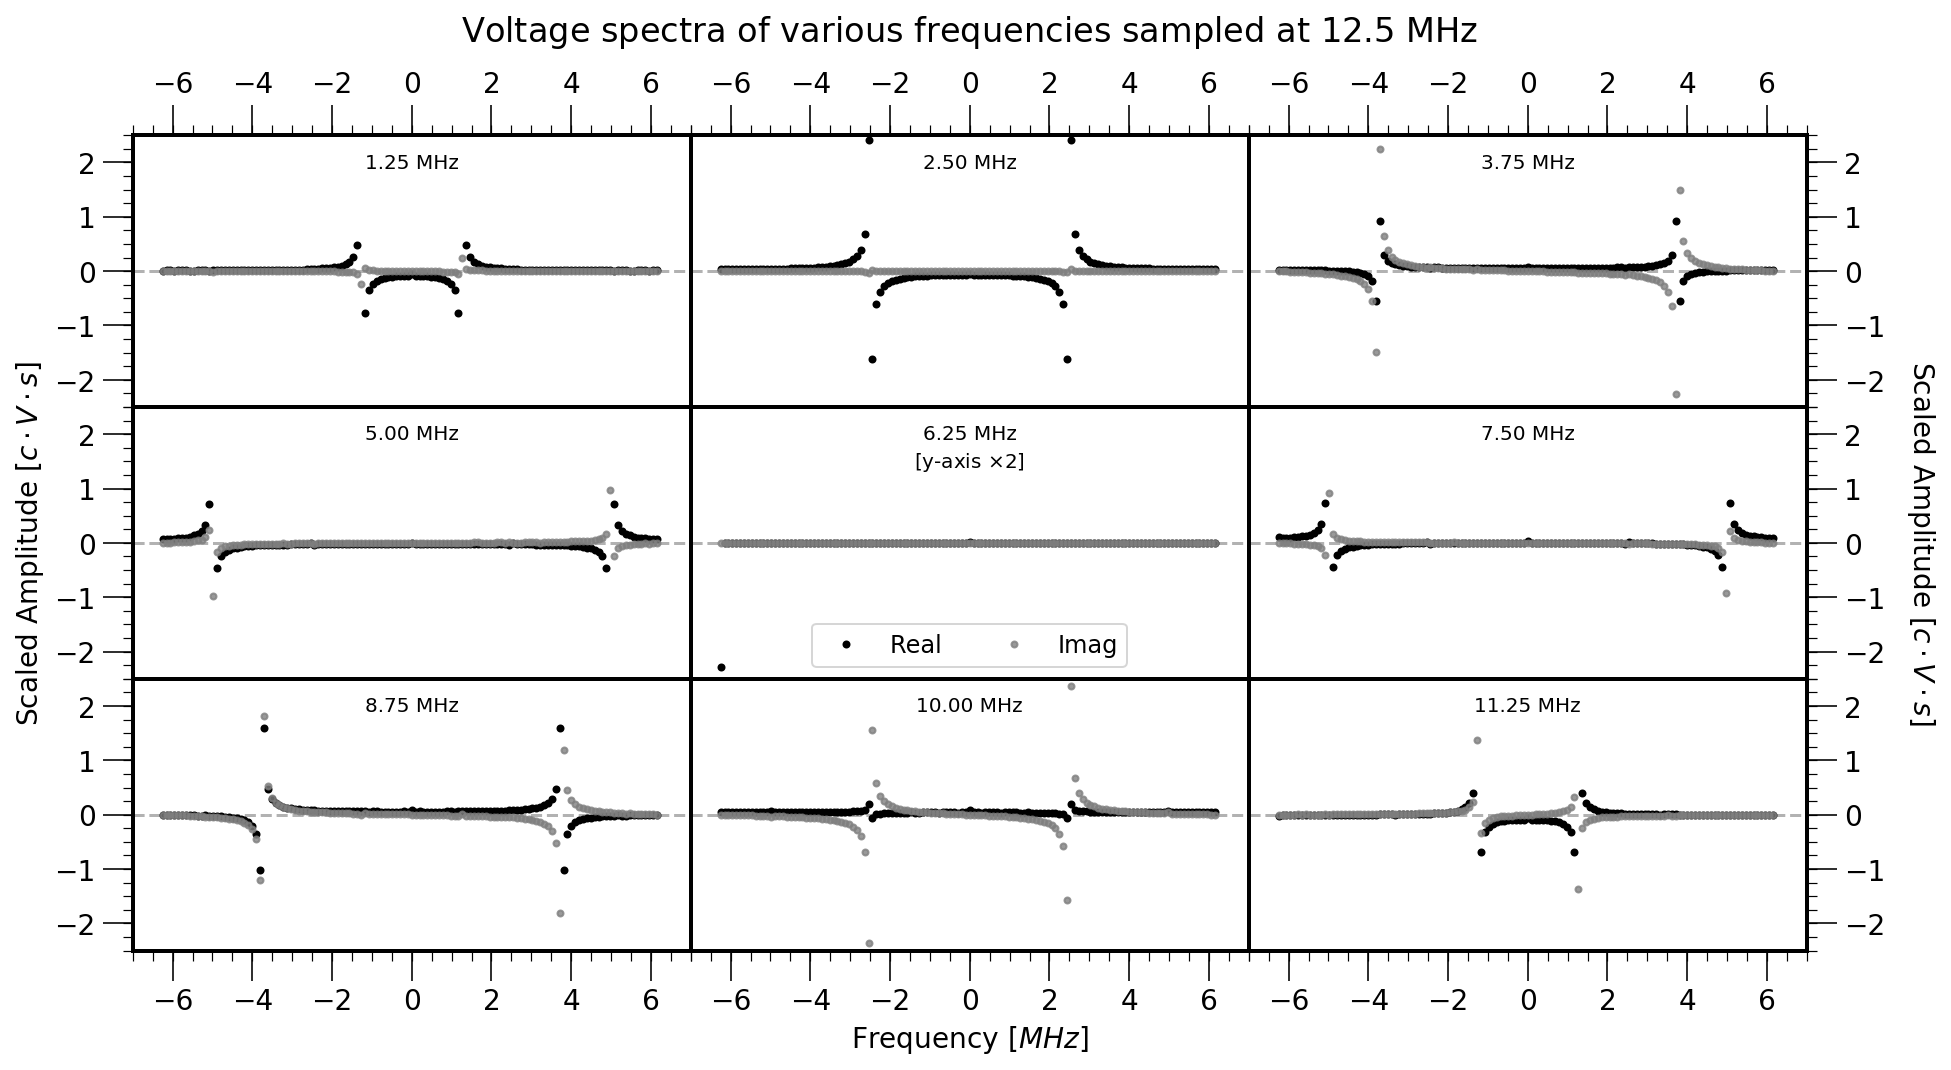

In [9]:
fig, axes = plt.subplots(3,3, figsize = (15, 7.5))

# to remove the 1e9 or 1e8 from plots
PLOT_SCALE = 1e4

for i , ax in enumerate(axes.reshape(-1)):

    # plot points
    ax.plot(dft_f_range,
            np.real(EF_data[i]) / PLOT_SCALE,
            ls = 'None',
            marker = 'o',
            color = 'black',
            label='Real',
            markersize = 3,
            alpha = 1)
    
    
    # plot points    
    ax.plot(dft_f_range,
            np.imag(EF_data[i]) / PLOT_SCALE,
            ls = 'None',
            marker = 'o',
            color = 'grey',
            markerfacecolor = 'grey',
            label='Imag',
            markersize = 3,
            alpha = 0.8)
    
    # Plot baseline
    ax.axhline(0, color = 'black', ls = '--', alpha = 0.3, zorder = 0)

    # remove ticks
    ax.set_xticks([])
    ax.set_yticks([])
    
    # 
    ax.set_xlim(-7, 7)
    ax.set_ylim(-2.5,2.5)


    ax.text(0.5, 0.9,
            '%.2f MHz' %freqs_to_test[i].value,
            horizontalalignment='center',
            verticalalignment='center',
            transform=ax.transAxes, fontsize = 10)
    if i == 4:
        ax.set_ylim(-5,5)
        ax.text(0.5, 0.8,
                r'[y-axis $\times2$]',
                horizontalalignment='center',
                verticalalignment='center',
                transform=ax.transAxes, fontsize = 10)
        
        ax.legend(ncol = 2, loc = 'lower center', fontsize = 12)

    
    # set ticks for left side of plotgrid
    if (i % 3) == 0:
        ax.yaxis.set_major_locator(MultipleLocator(1))
        ax.yaxis.set_minor_locator(MultipleLocator(0.25)) 
        ax.tick_params(which='major', length = 15)
        ax.tick_params(which='minor', length = 5)

    # set ticks for right side of plotgrid
    if ((i - 2) % 3) == 0:
        ax_right = ax.twinx()
        ax_right.set_ylim(ax.get_ylim())
        ax_right.yaxis.set_major_locator(MultipleLocator(1))
        ax_right.yaxis.set_minor_locator(MultipleLocator(0.25)) 
        ax_right.tick_params(which='major', length = 15)
        ax_right.tick_params(which='minor', length = 5)
    
    # set ticks for top side of plotgrid
    if i < 3:
        ax_top = ax.twiny()
        ax_top.set_xlim(ax.get_xlim())
        ax_top.set_xticks(np.arange(-6,7))
        ax_top.xaxis.set_major_locator(MultipleLocator(2))
        ax_top.xaxis.set_minor_locator(MultipleLocator(0.5))  
        ax_top.tick_params(which='major', length = 15)
        ax_top.tick_params(which='minor', length = 5)
    
    # set ticks for bottom side of plotgrid
    if i > 5:

        ax.set_xticks(np.arange(-6,7))
        ax.xaxis.set_major_locator(MultipleLocator(2))
        ax.xaxis.set_minor_locator(MultipleLocator(0.5))
        ax.tick_params(which='major', length = 15)
        ax.tick_params(which='minor', length = 5)

    if i == 3:
        ax.set_ylabel(r'Scaled Amplitude $[c \cdot V \cdot s]$')
    
    if i == 5:
        ax.set_ylabel(r'Scaled Amplitude $[c \cdot V \cdot s]$', rotation = 270, labelpad = 65)
        ax.yaxis.set_label_position('right')
        
    if i == 7:
        ax.set_xlabel(r'Frequency $[MHz]$')
    
    if i == 1:
        ax.set_title(r'Voltage spectra of various frequencies sampled at $12.5$ MHz', y = 1.3)
    

plt.subplots_adjust(hspace=0, wspace = 0)

plt.show()
fig.savefig('fourier_transform_3_3.pdf', dpi = 'figure', format = 'pdf', transparent = True)